# Machine Learning Project - Real estate price predictor

## Problem Statement: 
Predict real estate transaction prices based on property features, neighborhood demographics, and location convenience scores.

## Data Overview

For this project:
1. The dataset has 1481 observations in the USA.
2. Each observation is for the transaction of one property only.
3. Each transaction was between \$200,000  and  \\\$800,000.

#### Target Variable
* 'tx_price' - Transaction price in USD

#### Features of the data:

Public records:
* 'tx_year' - Year the transaction took place
* 'property_tax' - Monthly property tax
* 'insurance' - Cost of monthly homeowner's insurance

Property characteristics:
* 'beds' - Number of bedrooms
* 'no_of_bathrooms' - Number of bathrooms
* 'sqft' - Total floor area in squared feet
* 'lot_size' - Total outside area in squared feet
* 'year_built' - Year property was built
* 'active_life' - Number of gyms, yoga studios, and sports venues within 1 mile
* 'basement' - Does the property have a basement?
* 'exterior_walls' - The material used for constructing walls of the house
* 'roof' - The material used for constructing the roof

Location convenience scores:
* 'restaurants' - Number of restaurants within 1 mile
* 'groceries' - Number of grocery stores within 1 mile
* 'nightlife' - Number of nightlife venues within 1 mile
* 'cafes' - Number of cafes within 1 mile
* 'shopping_malls' - Number of stores within 1 mile
* 'arts_entertainment' - Number of arts and entertainment venues within 1 mile
* 'beauty_spas' - Number of beauty and spa locations within 1 mile
* 'active_life' - Number of gyms, yoga studios, and sports venues within 1 mile

Schools:
* 'num_schools' - Number of public schools within district
* 'median_school' - Median score of the public schools within district, on the range 1 - 10

### Type of Machine Learning Problem
It is a regression problem, where given the above set of features, we need to predict the transaction price of the house.


Additional Metrics: RMSE, R²,

# Some analysis on the raw data set

#### Import the libraries

In [1]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

import pandas as pd

import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings("ignore")

from math import sqrt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_error as mae

import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [3]:
df = pd.read_csv('data_set.csv')

Display the dimensions of the dataset.

In [4]:
df.shape

(1480, 24)

In [5]:
df.columns

Index(['year_built', 'no_of_bathrooms', 'sqft', 'no_of_beds', 'lot_size',
       'exterior_walls', 'roof', 'basement', 'restaurants', 'groceries',
       'nightlife', 'cafes', 'shopping_malls', 'arts_entertainment',
       'beauty_spas', 'active_life', 'median_age', 'property_tax', 'insurance',
       'median_school', 'num_schools', 'tx_year', 'property_type', 'tx_price'],
      dtype='object')

## Some of the features:

In [6]:
df.dtypes[df.dtypes=='object']

exterior_walls    object
roof              object
property_type     object
dtype: object

### Bar plots for categorical Features

<Axes: xlabel='count', ylabel='roof'>

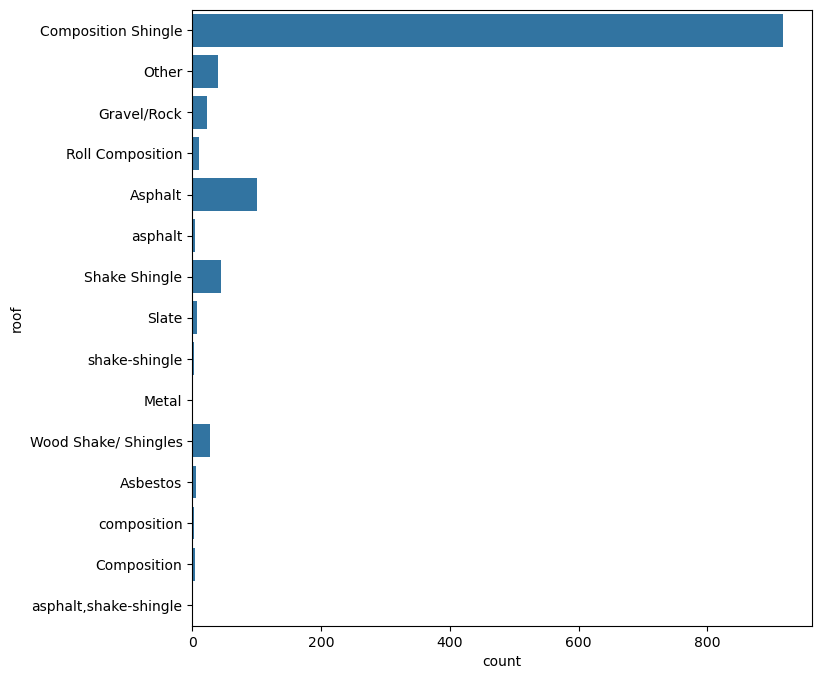

In [7]:
plt.figure(figsize=(8,8))
sns.countplot(y='roof', data=df)

<Axes: xlabel='count', ylabel='property_type'>

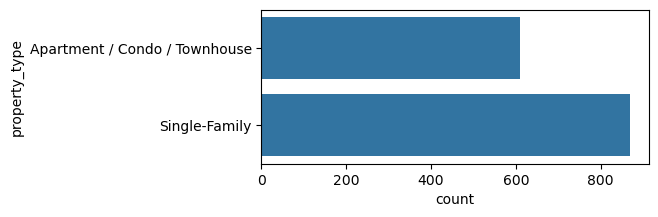

In [8]:
plt.figure(figsize=(5,2))
sns.countplot(y='property_type', data=df)

## Correlations
* ***Correlation*** is a value between -1 and 1.
* Positive correlation: one feature increases, the other increases; eg. a child's age and her height.
* Negative correlation: one feature increases, the other decreases; eg. hours spent studying and number of parties attended.
* Correlations near -1 or 1 indicate a strong relationship.
* 0 indicates no relationship.

## Co-relation Heat Map:

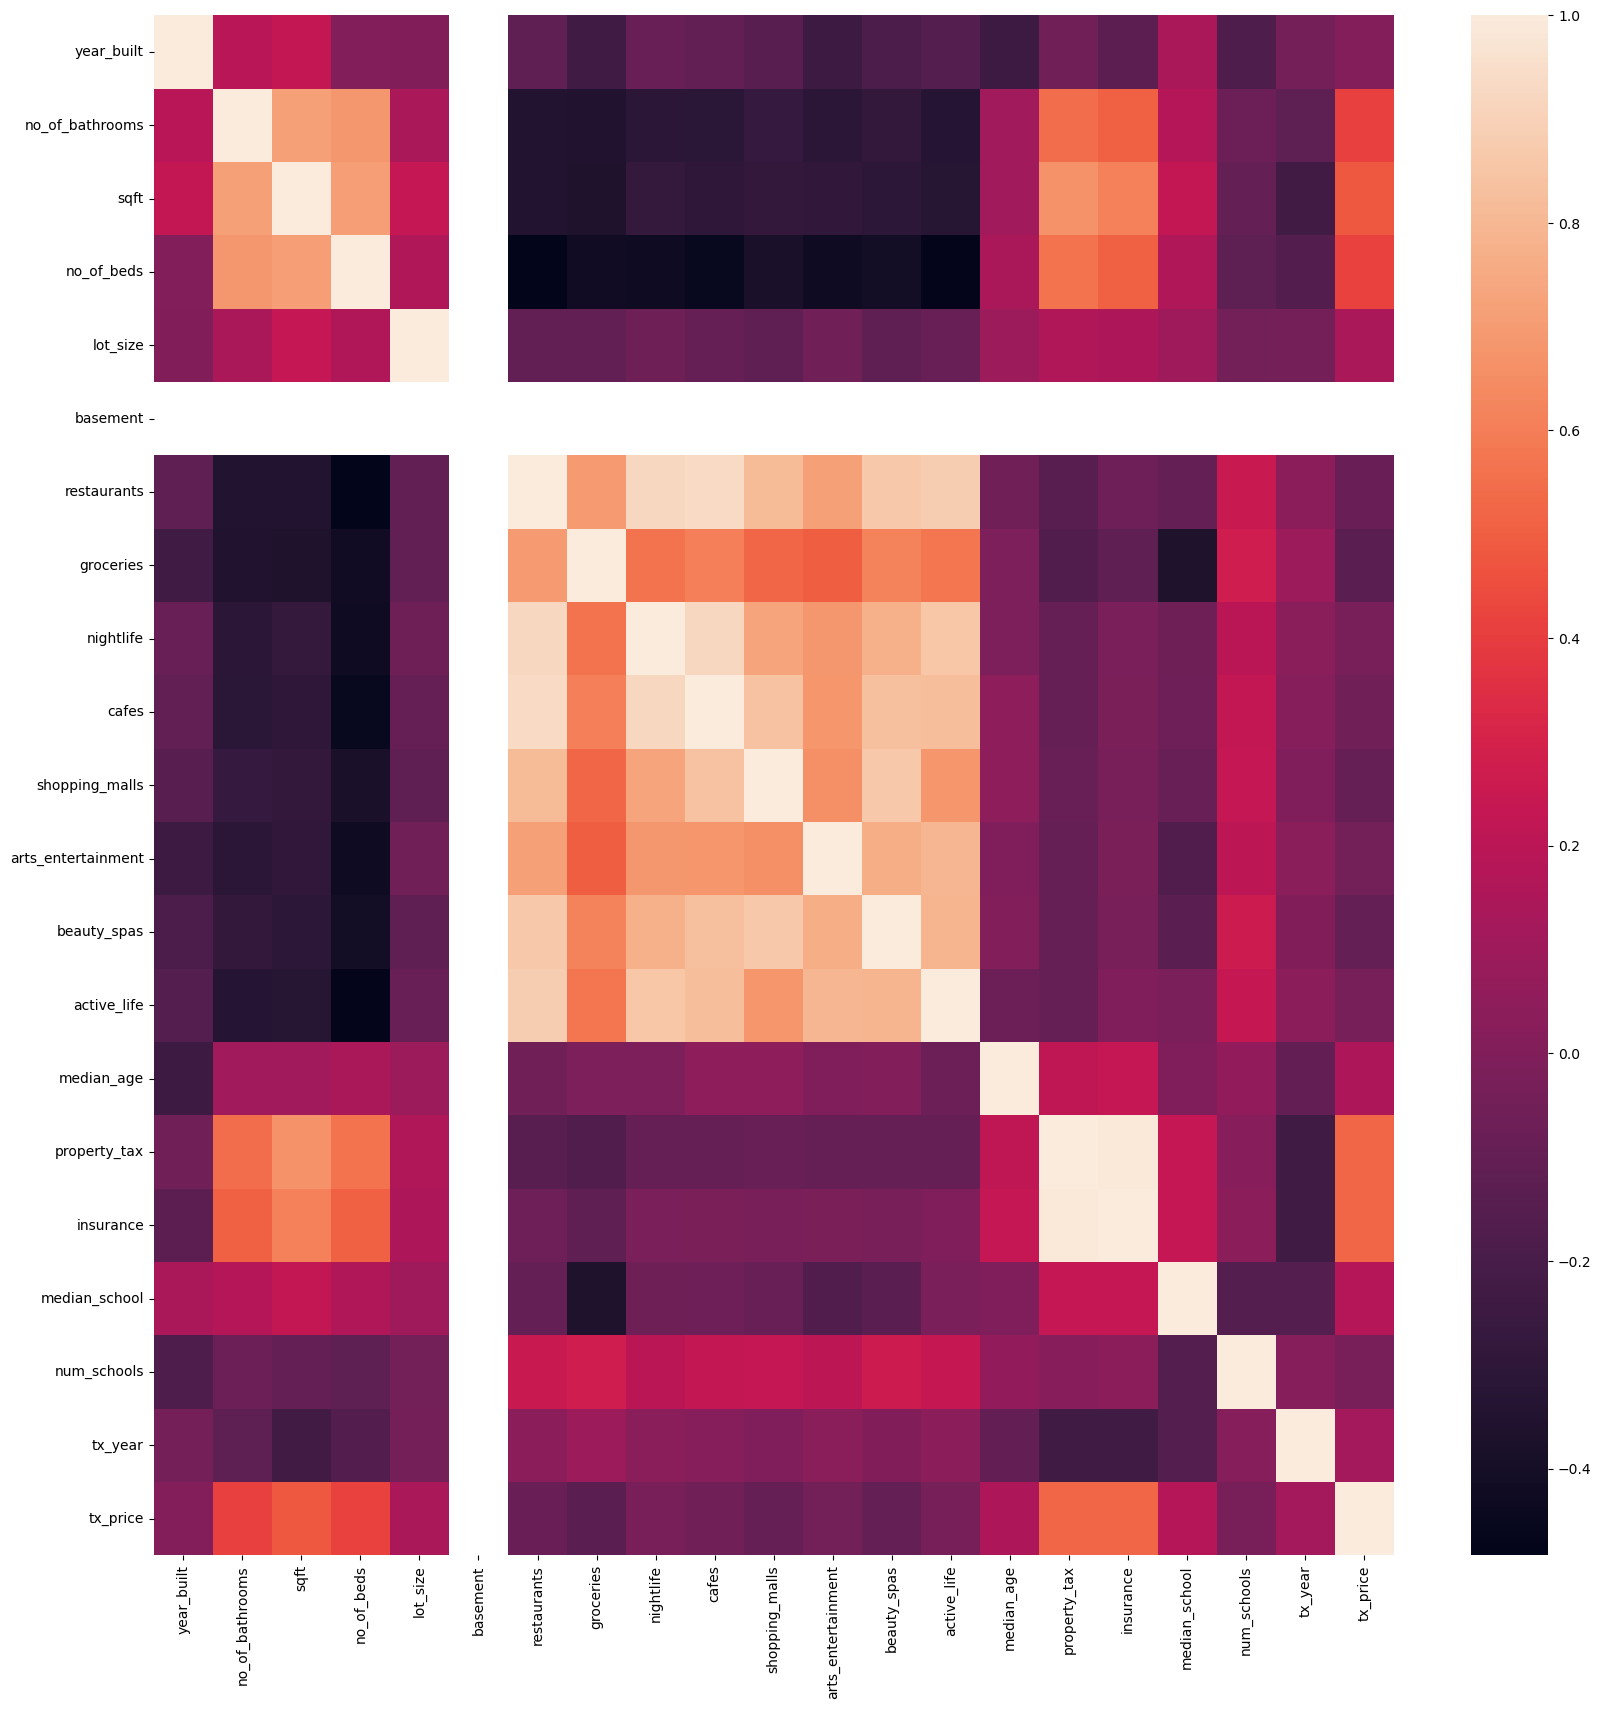

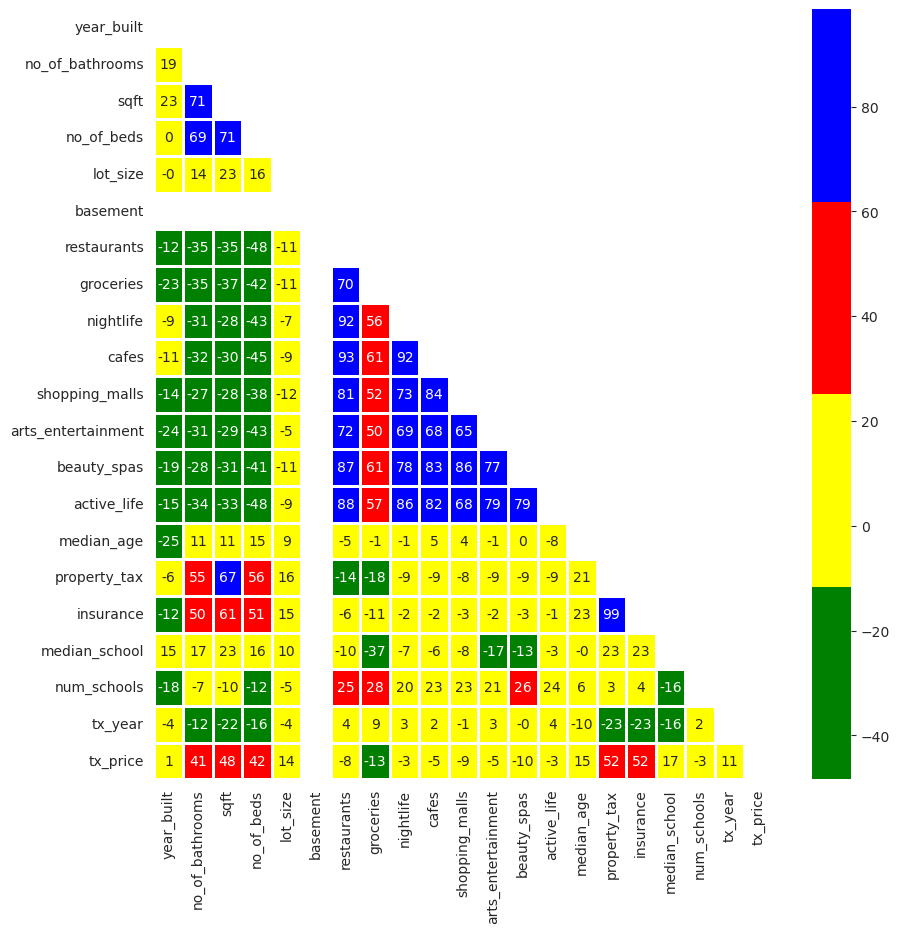

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(df.select_dtypes(include=['number']).corr())
mask=np.zeros_like(df.select_dtypes(include=['number']).corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.select_dtypes(include=['number']).corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

# Data Cleaning

##  Dropping the duplicates:


In [10]:
df = df.drop_duplicates()
print( df.shape )

(1474, 24)


## Handling NaN values:
* The basement feature has some nan values, to handle them:

In [11]:
df.basement.unique()

array([nan,  1.])

In [12]:
df.basement.fillna(0, inplace=True)
df.basement.unique()

array([0., 1.])

In [13]:
df.select_dtypes(include=['object']).isnull().sum()

exterior_walls    170
roof              281
property_type       0
dtype: int64

#### handling missing data for categorical features by label them as 'missed_values'

In [14]:
df['exterior_walls'] = df['exterior_walls'].fillna('missed_values')
df['roof'] = df['roof'].fillna('missed_values')
df.select_dtypes(include=['object']).isnull().sum()

exterior_walls    0
roof              0
property_type     0
dtype: int64

## Handle missing numerical values

In [15]:
df.select_dtypes(exclude=['object']).isnull().sum()

year_built            0
no_of_bathrooms       0
sqft                  0
no_of_beds            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping_malls        0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
tx_price              0
dtype: int64

## Combine the unnecessary fields which are repeated into a single feature::

<Axes: xlabel='count', ylabel='roof'>

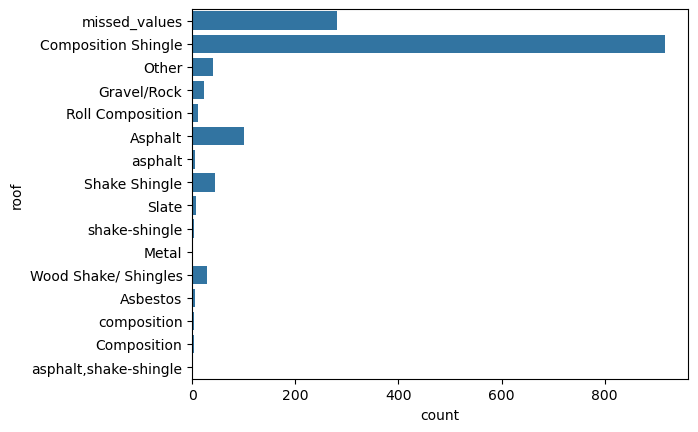

In [16]:
sns.countplot(y='roof', data=df)

In [17]:
df.roof.replace('composition', 'Composition', inplace=True)
df.roof.replace('asphalt', 'Asphalt', inplace=True)
df.roof.replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle', inplace=True)

#### Result

<Axes: xlabel='count', ylabel='roof'>

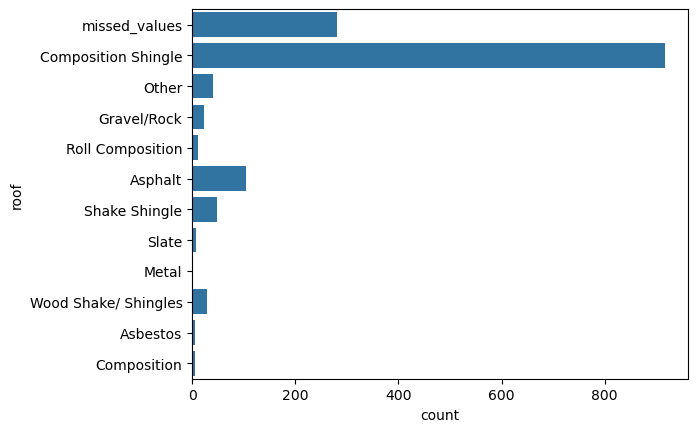

In [18]:
sns.countplot(y='roof', data=df)

## Now for exterior walls:

<Axes: xlabel='count', ylabel='exterior_walls'>

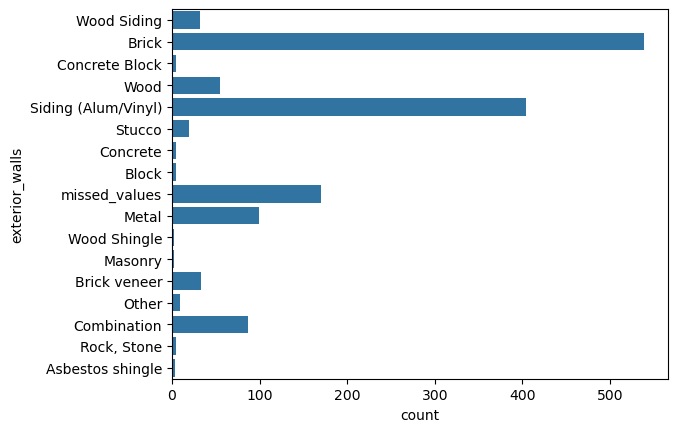

In [19]:
sns.countplot(y='exterior_walls', data=df)

#### Result

<Axes: xlabel='count', ylabel='exterior_walls'>

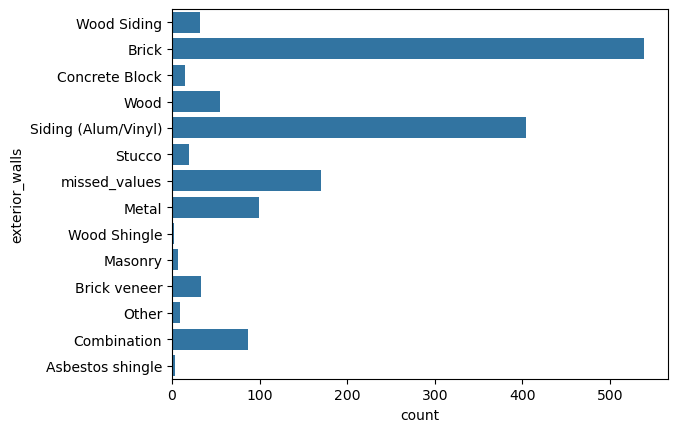

In [20]:
df.exterior_walls.replace(['Rock, Stone'], 'Masonry', inplace=True)
df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace=True)
sns.countplot(y='exterior_walls', data=df)

In [21]:
df.to_csv('cleaned_df.csv', index=None)

#  Feature Engineering

##  Handling Sparse Classes

In [100]:
df['two_and_two'] = ((df.no_of_beds == 2) & (df.no_of_bathrooms == 2)).astype(int)

In [101]:
df[df['two_and_two']==1].shape[0]/df.shape[0]

0.10651289009497965

In [102]:
df['tax_and_insurance'] = df.property_tax + df.insurance

The interpretation is that almost 9.5% of the observations in our dataset were for properties with 2 no_of_beds and 2 no_of_bathrooms.

In [103]:
df['property_age'] = df.tx_year - df.year_built

In [104]:
print(df.property_age.min())

-8


**we are only considering the houses that already exist**! <br>
so we are eliminating the property_age < 0

In [105]:
print(sum(df.property_age < 0))

16


In [106]:
df = df[df.property_age >= 0]
df.shape

(1458, 27)

In [107]:
df['school_score'] = df.num_schools * df.median_school

In [108]:
df.school_score.median()

18.0

## Sparse Classes
Sparse classes are classes in categorical features that have a very small number of observations.

* Because of this the model may overfit.

**Observation from our data:** In both 'exterior_walls' and 'roof' as well we have many sparse classes

<Axes: xlabel='count', ylabel='exterior_walls'>

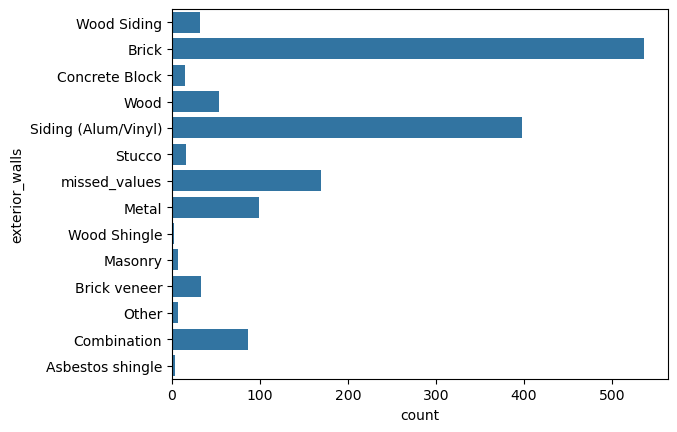

In [109]:
sns.countplot(y='exterior_walls', data=df) 

In [110]:
df.exterior_walls.replace(['Wood Siding', 'Wood Shingle', 'Wood'], 'Wood', inplace=True)

In [111]:
other_exterior_walls = ['Concrete Block', 'Stucco', 'Masonry', 'Other', 'Asbestos shingle']
df.exterior_walls.replace(other_exterior_walls, 'Other', inplace=True)

Result:

<Axes: xlabel='count', ylabel='exterior_walls'>

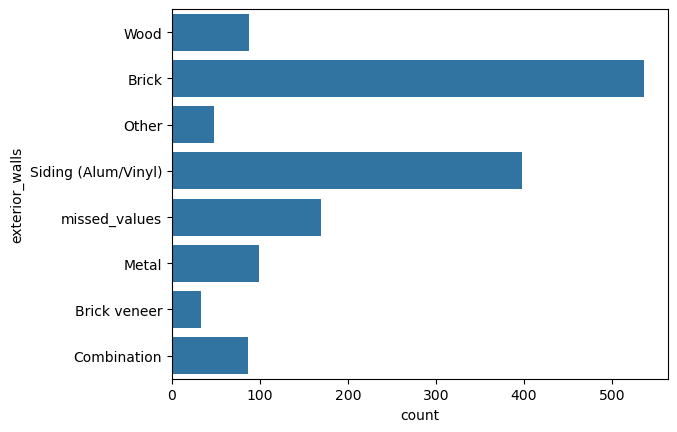

In [112]:
sns.countplot(y='exterior_walls', data=df)

For 'roof'

<Axes: xlabel='count', ylabel='roof'>

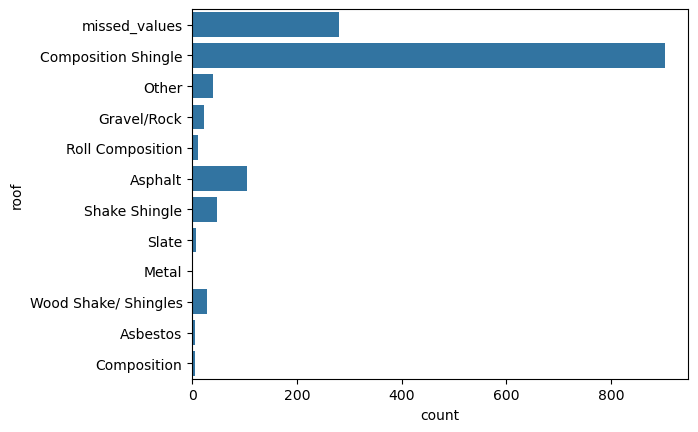

In [113]:
sns.countplot(y='roof', data=df)

Grouping 'Composition' and 'Wood Shake/ Shingles' into the 'Composition Shingle'.

In [114]:
df.roof.replace(['Composition', 'Wood Shake/ Shingles'], 'Composition Shingle', inplace=True)

In [115]:
other_roof = ['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal']
df.roof.replace(other_roof, 'Other', inplace=True)

Result:

<Axes: xlabel='count', ylabel='roof'>

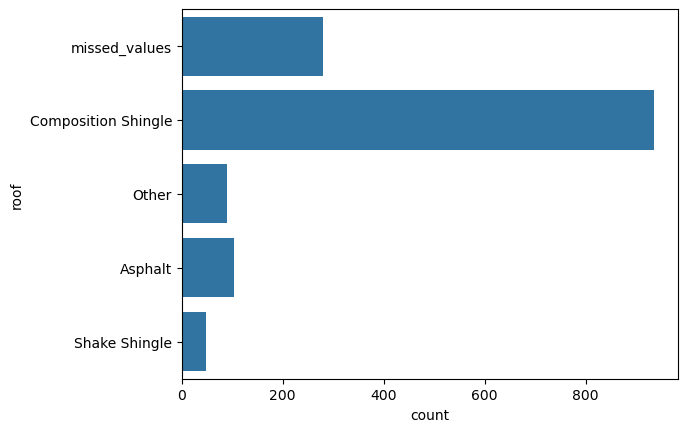

In [116]:
sns.countplot(y='roof', data=df)

## Encode dummy variables (One Hot Encoding)
* ML models cant handle the text value so we need to convert them into numeric values, binary.

In [117]:
df = pd.get_dummies(df, columns=['exterior_walls', 'roof', 'property_type'])

##  Remove unused or redundant features

* Also remove 'property_tax' and 'insurance' & 'tx_year' and 'year_built' as we have combined them in 'tax_and _insurance' and 'property_age'

In [118]:
df = df.drop(['tx_year', 'year_built'], axis=1)

In [119]:
df = df.drop(['property_tax', 'insurance'], axis=1)  ## axis=1 because we are dropping columns.

<Axes: xlabel='count', ylabel='basement'>

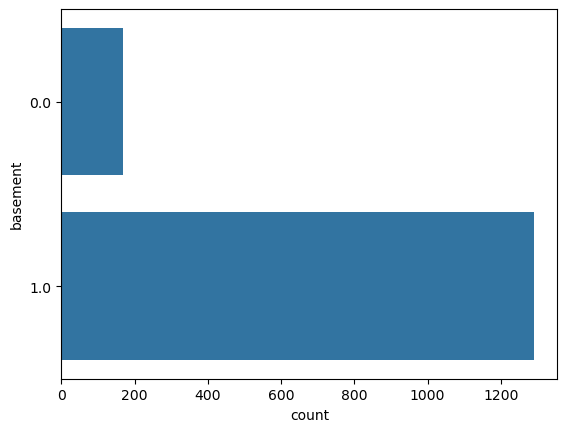

In [120]:
sns.countplot(y='basement', data=df)

In [121]:
df = df.drop(['basement'], axis=1) 

In [122]:
df = df.drop(['nightlife'], axis=1) 

In [123]:
df.to_csv('analyzed_data.csv', index=None)

# Machine Learning Model
## Data Preparation

In [124]:
df = pd.read_csv("analyzed_data.csv")

In [125]:
print(df.shape)

(1458, 34)


###  Train and Test Splits
Separate your dataframe into separate objects for the target variable (y) and the input features (X) and perform the train and test split

In [126]:
y = df.tx_price
X = df.drop('tx_price', axis=1)
df.describe()

,no_of_bathrooms,sqft,no_of_beds,lot_size,restaurants,groceries,cafes,shopping_malls,arts_entertainment,beauty_spas,active_life,median_age,median_school,num_schools,tx_price,two_and_two,tax_and_insurance,property_age,school_score
count,1458.000000,1458.000000,1458.000000,1.458000e+03,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,2.581619,2300.496571,3.432785,1.371262e+04,38.902606,4.453361,5.117284,39.262003,3.305213,22.907407,15.588477,38.698217,6.469136,2.784636,421817.954047,0.107682,599.430041,24.843621,17.846365
std,0.910846,1313.768730,1.045930,4.804987e+04,45.446358,4.472238,7.214478,50.853227,4.641668,25.702651,17.502840,6.558810,1.995553,0.518945,149052.664570,0.310084,294.342784,20.884694,6.481354
min,1.000000,500.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.000000,1.000000,200000.000000,0.000000,159.000000,0.000000,3.000000
25%,2.000000,1360.000000,3.000000,1.544250e+03,7.000000,1.000000,0.000000,6.000000,0.000000,4.000000,4.000000,34.000000,5.000000,3.000000,300000.000000,0.000000,416.000000,7.000000,12.000000
50%,3.000000,1855.500000,4.000000,6.250000e+03,22.000000,3.000000,3.000000,21.000000,2.000000,15.000000,10.000000,38.000000,7.000000,3.000000,394000.000000,0.000000,546.500000,21.000000,18.000000
75%,3.000000,2943.000000,4.000000,1.176100e+04,55.000000,7.000000,6.000000,49.000000,5.000000,35.000000,20.000000,43.000000,8.000000,3.000000,525000.000000,0.000000,731.000000,39.000000,24.000000
max,6.000000,7842.000000,5.000000,1.220551e+06,213.000000,24.000000,39.000000,340.000000,33.000000,177.000000,89.000000,69.000000,10.000000,4.000000,800000.000000,1.000000,5882.000000,114.000000,30.000000


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1312, 33) (146, 33) (1312,) (146,)


In [128]:
# we here used mean and standard deviation of each feature, mean of all features as 0 and standard devation as 1
train_mean = X_train.mean() 
train_std = X_train.std()

In [129]:
X_train = (X_train - train_mean) / train_std
X_test.describe()

,no_of_bathrooms,sqft,no_of_beds,lot_size,restaurants,groceries,cafes,shopping_malls,arts_entertainment,beauty_spas,active_life,median_age,median_school,num_schools,two_and_two,tax_and_insurance,property_age,school_score
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,2.472603,2141.527397,3.369863,13782.595890,39.075342,4.554795,5.205479,39.034247,3.006849,22.691781,15.534247,38.212329,6.455479,2.753425,0.130137,548.506849,24.102740,17.568493
std,0.753797,1177.709613,0.954219,46977.213481,46.106337,4.391262,7.332420,50.243602,4.124772,24.698615,17.875494,5.883008,1.965146,0.557849,0.337612,204.485300,19.217711,6.443288
min,1.000000,689.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,2.000000,1.000000,0.000000,199.000000,0.000000,6.000000
25%,2.000000,1315.500000,3.000000,1455.000000,7.250000,1.000000,0.250000,7.250000,0.000000,5.000000,5.000000,34.000000,5.000000,3.000000,0.000000,399.250000,7.250000,12.000000
50%,2.000000,1705.500000,3.000000,4098.500000,21.000000,3.500000,3.000000,18.500000,1.500000,14.500000,10.000000,38.000000,7.000000,3.000000,0.000000,486.000000,21.500000,18.000000
75%,3.000000,2620.250000,4.000000,10597.500000,55.000000,7.000000,6.000000,50.500000,5.000000,34.750000,17.000000,41.000000,8.000000,3.000000,0.000000,668.250000,38.000000,24.000000
max,5.000000,6346.000000,5.000000,435600.000000,202.000000,22.000000,39.000000,302.000000,33.000000,173.000000,89.000000,59.000000,10.000000,3.000000,1.000000,1272.000000,73.000000,30.000000


In [130]:
X_test = (X_test - train_mean) / train_std
X_test.describe()

,no_of_bathrooms,sqft,no_of_beds,lot_size,restaurants,groceries,cafes,shopping_malls,arts_entertainment,beauty_spas,...,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,exterior_walls_missed_values,roof_Asphalt,roof_Composition Shingle,roof_Other,roof_Shake Shingle,roof_missed_values,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,-0.130810,-0.133099,-0.066231,0.001614,0.004229,0.025146,0.013605,-0.004969,-0.070607,-0.009280,...,0.019582,-0.057285,0.073783,-0.041521,-0.059277,0.129086,-0.034088,0.038003,0.096116,-0.096116
std,0.813920,0.887311,0.903833,0.974928,1.015780,0.979610,1.017826,0.986339,0.878373,0.956534,...,1.012881,0.890416,1.086989,0.930856,1.019166,1.215420,0.909486,1.031966,1.015671,1.015671
min,-1.720869,-1.227463,-2.310957,-0.284419,-0.856649,-0.990945,-0.708977,-0.771255,-0.710918,-0.888093,...,-0.611177,-0.256418,-0.357798,-0.279287,-1.346873,-0.249601,-0.186209,-0.485000,-0.836032,-1.195215
25%,-0.641108,-0.755445,-0.416564,-0.254223,-0.696923,-0.767863,-0.674274,-0.628929,-0.710918,-0.694452,...,-0.611177,-0.256418,-0.357798,-0.279287,-1.346873,-0.249601,-0.186209,-0.485000,-0.836032,-1.195215
50%,-0.641108,-0.461611,-0.416564,-0.199362,-0.393993,-0.210159,-0.292541,-0.408079,-0.391492,-0.326533,...,-0.611177,-0.256418,-0.357798,-0.279287,0.741895,-0.249601,-0.186209,-0.485000,-0.836032,0.836032
75%,0.438653,0.227581,0.530632,-0.064487,0.355069,0.570626,0.123894,0.220117,0.353836,0.457714,...,1.634941,-0.256418,-0.357798,-0.279287,0.741895,-0.249601,-0.186209,-0.485000,1.195215,0.836032
max,2.598175,3.034639,1.477829,8.755680,3.593661,3.916851,4.704680,5.157346,6.316458,5.811893,...,1.634941,3.896915,2.792744,3.577815,0.741895,4.003341,5.366211,2.060282,1.195215,0.836032


## Model Random Forest Regression

In [131]:
import numpy as np

# Define the RandomForestRegressor class
class RandomForestRegressor:
    def __init__(self, n_estimators=200, max_depth=15, min_samples_split=10, min_samples_leaf=5, max_features="sqrt"):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.trees = []
        self.feature_subsets = []

    def bootstrap_sample(self, X, y):
        indices = np.random.choice(len(X), len(X), replace=True)
        return X[indices], y[indices]

    def _calculate_split(self, X, y):
        """Calculate the best split for a given feature and target."""
        best_split = None
        best_mse = float("inf")
        for i in range(len(X)):
            left_mask = X <= X[i]
            right_mask = X > X[i]
            if np.sum(left_mask) < self.min_samples_leaf or np.sum(right_mask) < self.min_samples_leaf:
                continue
            left_y = y[left_mask]
            right_y = y[right_mask]
            mse = np.mean((left_y - left_y.mean())**2) * len(left_y) + np.mean((right_y - right_y.mean())**2) * len(right_y)
            if mse < best_mse:
                best_mse = mse
                best_split = X[i]
        return best_split

    def build_tree(self, X, y, depth=0):
        """Recursively build a decision tree."""
        if depth == self.max_depth or len(y) < self.min_samples_split:
            return np.mean(y)
        feature_idx = np.random.choice(X.shape[1], int(np.sqrt(X.shape[1])), replace=False)
        best_feature, best_split = None, None
        best_mse = float("inf")
        for idx in feature_idx:
            split = self._calculate_split(X[:, idx], y)
            if split is None:
                continue
            left_mask = X[:, idx] <= split
            right_mask = X[:, idx] > split
            left_y = y[left_mask]
            right_y = y[right_mask]
            mse = np.mean((left_y - left_y.mean())**2) * len(left_y) + np.mean((right_y - right_y.mean())**2) * len(right_y)
            if mse < best_mse:
                best_mse = mse
                best_feature, best_split = idx, split
        if best_feature is None:
            return np.mean(y)
        left_mask = X[:, best_feature] <= best_split
        right_mask = X[:, best_feature] > best_split
        left_tree = self.build_tree(X[left_mask], y[left_mask], depth + 1)
        right_tree = self.build_tree(X[right_mask], y[right_mask], depth + 1)
        return {"feature": best_feature, "split": best_split, "left": left_tree, "right": right_tree}

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        for _ in range(self.n_estimators):
            X_sample, y_sample = self.bootstrap_sample(X, y)
            tree = self.build_tree(X_sample, y_sample)
            self.trees.append(tree)

    def _predict_tree(self, tree, x):
        """Predict a single sample using a single tree."""
        if not isinstance(tree, dict):
            return tree
        if x[tree["feature"]] <= tree["split"]:
            return self._predict_tree(tree["left"], x)
        else:
            return self._predict_tree(tree["right"], x)

    def predict(self, X):
        X = np.array(X)
        predictions = [np.mean([self._predict_tree(tree, x) for tree in self.trees]) for x in X]
        return np.array(predictions)


In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df = pd.read_csv("analyzed_data.csv")
y = df.tx_price
X = df.drop("tx_price", axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1234)


train_mean = X_train.mean(axis=0)
train_std = X_train.std(axis=0)
X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean) / train_std


custom_model = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=10, min_samples_leaf=5)
custom_model.fit(X_train.values, y_train.values)

train_predictions_custom = custom_model.predict(X_train.values)
test_predictions_custom = custom_model.predict(X_test.values)

train_r2_custom = r2_score(y_train, train_predictions_custom)
test_r2_custom = r2_score(y_test, test_predictions_custom)

print(f"Custom Model - Train R²: {train_r2_custom:.2f}, Test R²: {test_r2_custom:.2f}")


Custom Model - Train R²: 0.75, Test R²: 0.47


In [ ]:
from sklearn.ensemble import RandomForestRegressor

built_in_model = RandomForestRegressor(
    n_estimators=200, 
    max_depth=20, 
    min_samples_split=10, 
    min_samples_leaf=5, 
    random_state=1234
)
built_in_model.fit(X_train, y_train)

train_predictions_builtin = built_in_model.predict(X_train)
test_predictions_builtin = built_in_model.predict(X_test)

train_r2_builtin = r2_score(y_train, train_predictions_builtin)
test_r2_builtin = r2_score(y_test, test_predictions_builtin)

print(f"Built-in Model - Train R²: {train_r2_builtin:.2f}, Test R²: {test_r2_builtin:.2f}")


Built-in Model - Train R²: 0.78, Test R²: 0.50


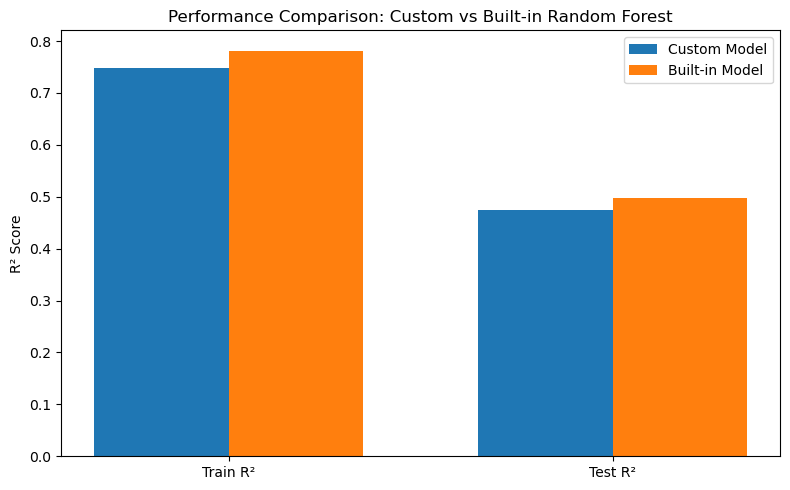

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ["Train R²", "Test R²"]
custom_scores = [train_r2_custom, test_r2_custom]
built_in_scores = [train_r2_builtin, test_r2_builtin]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width/2, custom_scores, width, label="Custom Model")
ax.bar(x + width/2, built_in_scores, width, label="Built-in Model")

ax.set_ylabel("R² Score")
ax.set_title("Performance Comparison: Custom vs Built-in Random Forest")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
def predict_price(model, feature_mean, feature_std, feature_names):

    print("Enter the values for the following features:")
    input_features = []

   
    for feature in feature_names:
        value = float(input(f"{feature}: "))
        input_features.append(value)

    input_array = np.array(input_features).reshape(1, -1)
    standardized_input = (input_array - feature_mean.values) / feature_std.values

    prediction = model.predict(standardized_input)

    
    print(f"\nPredicted Price: {prediction[0]:.2f}")
    return prediction[0]



feature_names = X_train.columns


predicted_price = predict_price(custom_model, train_mean, train_std, feature_names)


Enter the values for the following features:


# Knn Model - 

In [ ]:
X_train.head(20)

In [ ]:
y_train.describe()

In [ ]:
X_test.head(10)

In [ ]:
y_test.head(10)

In [ ]:
import numpy as np

def euclidean_distance(x1, x2):
    """
    Calculate the Euclidean distance between two points.
    Args:
        x1 (numpy array): First point.
        x2 (numpy array): Second point.
    Returns:
        float: Distance between the points.
    """
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNearestNeighborsRegressor:
    def __init__(self, n_neighbors=9, weight_type="distance"):
        """
        Initialize the kNN Regressor with hyperparameters.
        Args:
            n_neighbors (int): Number of neighbors to consider.
            weight_type (str): Weight type for neighbors, "uniform" or "distance".
        """
        if n_neighbors <= 0:
            raise ValueError("n_neighbors must be a positive integer.")
        if weight_type not in ["uniform", "distance"]:
            raise ValueError("weight_type must be 'uniform' or 'distance'.")
            
        self.n_neighbors = n_neighbors
        self.weight_type = weight_type
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        """
        Store the training data for future predictions.
        Args:
            X (numpy array): Training feature matrix.
            y (numpy array): Training target values.
        """
        if len(X) != len(y):
            raise ValueError("X and y must have the same number of samples.")
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def _get_weights(self, distances):
        """
        Calculate weights for neighbors based on the selected weight type.
        Args:
            distances (numpy array): Array of distances to neighbors.
        Returns:
            numpy array: Array of weights.
        """
        if self.weight_type == "uniform":
            return np.ones_like(distances)
        elif self.weight_type == "distance":
            # Avoid division by zero by adding a small epsilon
            return 1 / (distances + 1e-10)

    def predict(self, X):
        """
        Predict the target values for given test data.
        Args:
            X (numpy array): Test feature matrix.
        Returns:
            numpy array: Predicted target values.
        """
        if self.X_train is None or self.y_train is None:
            raise ValueError("The model must be fitted before prediction.")
            
        X = np.array(X)
        predictions = []
        for x in X:
            distances = np.array([euclidean_distance(x, x_train) for x_train in self.X_train])
            neighbor_indices = np.argsort(distances)[:self.n_neighbors]
            neighbor_distances = distances[neighbor_indices]
            neighbor_targets = self.y_train[neighbor_indices]
            weights = self._get_weights(neighbor_distances)
            prediction = np.dot(neighbor_targets, weights) / np.sum(weights)
            predictions.append(prediction)
        return np.array(predictions)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    total_variance = np.sum((y_true - np.mean(y_true)) ** 2)
    residual_variance = np.sum((y_true - y_pred) ** 2)
    return 1 - (residual_variance / total_variance)

if __name__ == "__main__":

    knn = KNearestNeighborsRegressor(n_neighbors=9, weight_type="distance")
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"MAE: {mae:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"R² Score: {r2:.3f}")


In [ ]:
import matplotlib.pyplot as plt


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


plt.figure(figsize=(8, 5))
metrics = ['MAE', 'MSE', 'R²']
values = [mae, mse, r2]

plt.bar(metrics, values, color=['skyblue', 'orange', 'green'])
plt.title('Model Evaluation Metrics', fontsize=14)
plt.ylabel('Values', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


for i, v in enumerate(values):
    plt.text(i, v + (0.05 if v > 0 else -0.05), f'{v:.3f}', ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot: Predicted vs True values
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')

plt.title('Predicted vs Actual Values', fontsize=14)
plt.xlabel('Actual Values (y_test)', fontsize=12)
plt.ylabel('Predicted Values (y_pred)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()


In [ ]:

print("Manual Hyperparameter Tuning:")
for k in range(1, 11):  
    knn_regressor = KNearestNeighborsRegressor(n_neighbors=k, weight_type="uniform")
    knn_regressor.fit(X_train, y_train)
    predictions = knn_regressor.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    print(f"k={k}, MAE: {mae:.3f}")

print("\nGrid Search for Hyperparameter Tuning:")

n_neighbors_values = [1, 3, 5, 7, 9, 11]
weight_types = ["uniform", "distance"]
distance_metrics = ["euclidean", "manhattan", "minkowski"]  
best_params = None
best_score = float('inf') 

for n_neighbors in n_neighbors_values:
    for weight_type in weight_types:
        for metric in distance_metrics:
            knn_regressor = KNearestNeighborsRegressor(n_neighbors=n_neighbors, weight_type=weight_type)
            
            knn_regressor.fit(X_train, y_train)
            predictions = knn_regressor.predict(X_test)
           
            mae = mean_absolute_error(y_test, predictions)
            
            print(f"n_neighbors={n_neighbors}, weight_type={weight_type}, metric={metric}, MAE={mae:.3f}")
            
            if mae < best_score:
                best_score = mae
                best_params = {
                    "n_neighbors": n_neighbors,
                    "weight_type": weight_type,
                    "metric": metric
                }


print("\nBest Parameters:")
print(best_params)
print(f"Best MAE: {best_score:.3f}")


In [ ]:
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []

for train_idx, val_idx in kf.split(X_train):
    X_fold_train, X_fold_val = X_train.values[train_idx], X_train.values[val_idx]
    y_fold_train, y_fold_val = y_train.values[train_idx], y_train.values[val_idx]

    
    knn_regressor = KNearestNeighborsRegressor(n_neighbors=3, weight_type="uniform")
    
    knn_regressor.fit(X_fold_train, y_fold_train)
    
    predictions = knn_regressor.predict(X_fold_val)
    
    mae_scores.append(mean_absolute_error(y_fold_val, predictions))

average_mae = np.mean(mae_scores)

print(f"MAE for each fold: {mae_scores}")
print(f"Average MAE from 5-fold cross-validation: {average_mae:.3f}")


In [ ]:
import matplotlib.pyplot as plt

knn_regressor_before = KNearestNeighborsRegressor(n_neighbors=5, weight_type="uniform")
knn_regressor_before.fit(X_train, y_train)
predictions_before = knn_regressor_before.predict(X_test)

knn_regressor_after = KNearestNeighborsRegressor(n_neighbors=3, weight_type="uniform")
knn_regressor_after.fit(X_train, y_train)
predictions_after = knn_regressor_after.predict(X_test)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions_before, color='blue', alpha=0.6, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("Actual Values (y_test)", fontsize=12)
plt.ylabel("Predicted Values (y_pred)", fontsize=12)
plt.title("Before Cross-Validation", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)

plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions_after, color='green', alpha=0.6, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("Actual Values (y_test)", fontsize=12)
plt.ylabel("Predicted Values (y_pred)", fontsize=12)
plt.title("After Cross-Validation", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

inbuilt_knn = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='euclidean')
inbuilt_knn.fit(X_train, y_train)
inbuilt_predictions = inbuilt_knn.predict(X_test)

inbuilt_mae = mean_absolute_error(y_test, inbuilt_predictions)
inbuilt_mse = mean_squared_error(y_test, inbuilt_predictions)
inbuilt_r2 = r2_score(y_test, inbuilt_predictions)

custom_predictions = y_pred 
custom_mae = mean_absolute_error(y_test, custom_predictions)
custom_mse = mean_squared_error(y_test, custom_predictions)
custom_r2 = r2_score(y_test, custom_predictions)

print("Custom kNN Regressor:")
print(f"MAE: {custom_mae:.3f}, MSE: {custom_mse:.3f}, R² Score: {custom_r2:.3f}")
print("Inbuilt kNN Regressor:")
print(f"MAE: {inbuilt_mae:.3f}, MSE: {inbuilt_mse:.3f}, R² Score: {inbuilt_r2:.3f}")

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(y_test, custom_predictions, color='blue', alpha=0.7, label="Custom Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("Actual Values (y_test)", fontsize=12)
plt.ylabel("Predicted Values (y_pred)", fontsize=12)
plt.title("Custom kNN: Actual vs Predicted", fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)

plt.subplot(1, 2, 2)
plt.scatter(y_test, inbuilt_predictions, color='green', alpha=0.7, label="Inbuilt Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("Actual Values (y_test)", fontsize=12)
plt.ylabel("Predicted Values (y_pred)", fontsize=12)
plt.title("Inbuilt kNN: Actual vs Predicted", fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()
